In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [6]:
train_path = "../dataset/preprocessed/netflix_train.csv"
val_path = "../dataset/preprocessed/netflix_val.csv"
test_path = "../dataset/preprocessed/netflix_test.csv"

train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)
test_data = pd.read_csv(test_path)

full_train_data = pd.concat([train_data, val_data])

X_train = full_train_data[['title', 'description']]
y_train = full_train_data['target_ages']

X_test = test_data[['title', 'description']]
y_test = test_data['target_ages']

In [7]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train['title'] + ' ' + X_train['description'])
X_test_vec = vectorizer.transform(X_test['title'] + ' ' + X_test['description'])

              precision    recall  f1-score   support

      Adults       0.54      0.82      0.65       614
        Kids       0.75      0.14      0.24        85
  Older Kids       0.46      0.27      0.34       223
       Teens       0.43      0.26      0.32       398

    accuracy                           0.52      1320
   macro avg       0.55      0.37      0.39      1320
weighted avg       0.51      0.52      0.47      1320

Accuracy: 0.5151515151515151


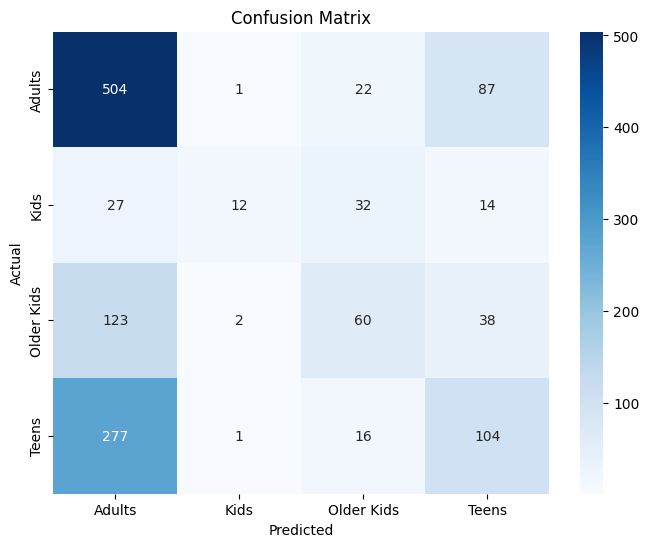

In [8]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42) # best n_estimators
rf_model.fit(X_train_vec, y_train)

y_pred = rf_model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
